In [234]:
# Import Libraries
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [235]:
df = pd.read_csv('C:/Datasets-master/datasets_nobel_laureate.csv')

In [236]:
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its....",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [237]:
df.keys()

Index(['Year', 'Category', 'Prize', 'Motivation', 'Prize Share', 'Laureate ID',
       'Laureate Type', 'Full Name', 'Birth Date', 'Birth City',
       'Birth Country', 'Sex', 'Organization Name', 'Organization City',
       'Organization Country', 'Death Date', 'Death City', 'Death Country'],
      dtype='object')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [239]:
#I uses value_counts() to determine the frequency of the values present in one particular column
bc = df['Birth Country'].value_counts()

In [240]:
bc.head(15)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Italy                        18
Canada                       18
Switzerland                  17
Austria                      15
Norway                       13
China                        12
Australia                    11
Name: Birth Country, dtype: int64

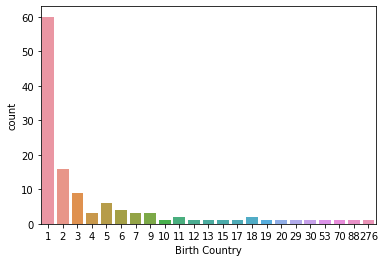

In [241]:
sns.countplot(bc)

In [242]:
bb = df['Birth City'].value_counts()

In [243]:
# Top 15 cities with max nobel laureate
bb.head(15)

New York, NY      48
Paris             25
London            21
Vienna            16
Chicago, IL       13
Berlin            11
Moscow             8
Boston, MA         8
Budapest           8
Brooklyn, NY       8
Washington, DC     8
Munich             8
Stockholm          7
Hamburg            6
Milwaukee, WI      5
Name: Birth City, dtype: int64

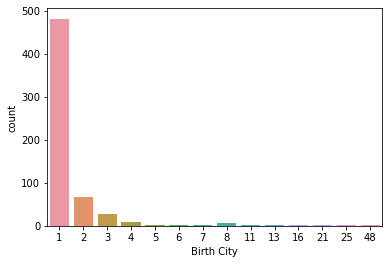

In [244]:
sns.countplot(bb)

In [245]:
# with normalize=True, the object returned contains the relative 
# frequencies of unique values (* 100 to get %ge)
bc = round(df['Birth Country'].value_counts(normalize=True) * 100,2)

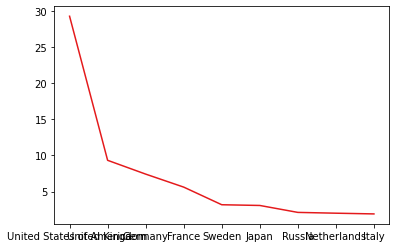

In [246]:
bc.head(9).plot()

In [247]:
# with normalize=True, the object returned contains the relative 
# frequencies of unique values (* 100 to get %ge)
round(df['Birth Country'].value_counts(normalize=True) * 100,2)

United States of America           29.27
United Kingdom                      9.33
Germany                             7.42
France                              5.62
Sweden                              3.18
                                   ...  
Lithuania                           0.11
German-occupied Poland (Poland)     0.11
Kenya                               0.11
Southern Rhodesia (Zimbabwe)        0.11
Trinidad                            0.11
Name: Birth Country, Length: 121, dtype: float64

In [248]:
# extract a subset of the data from a DataFrame to display multiple columns, rows
df_cat = df[['Prize','Category','Sex','Birth Country']]

In [249]:
df_cat.head()

,Prize,Category,Sex,Birth Country
0,The Nobel Prize in Chemistry 1901,Chemistry,Male,Netherlands
1,The Nobel Prize in Literature 1901,Literature,Male,France
2,The Nobel Prize in Physiology or Medicine 1901,Medicine,Male,Prussia (Poland)
3,The Nobel Peace Prize 1901,Peace,Male,Switzerland
4,The Nobel Peace Prize 1901,Peace,Male,France


In [250]:
# I use value_counts() to determine the frequency of the values present in one particular column
df_cat['Sex'].value_counts()

Male      893
Female     50
Name: Sex, dtype: int64

In [251]:
# with normalize=True, the object returned contains the relative 
# frequencies of unique values (* 100 to get %ge)
round(df_cat['Sex'].value_counts(normalize=True) * 100,2)

Male      94.7
Female     5.3
Name: Sex, dtype: float64

In [252]:
# crosstab() computes a simple cross-tabulation of two (or more) factors
pd.crosstab(df_cat.Sex, df_cat.Category)

Category,Chemistry,Economics,Literature,Medicine,Peace,Physics
Sex,,,,,,
Female,4,2,14,12,16,2
Male,190,81,99,215,88,220


In [253]:
# using isnull(), sum(), sort_values(), count() to get the total missing values and % missing for the features
# I am using sort_values() and head() on the output because I don't need to see all features, many have no missing values
total_missing = df.isnull().sum().sort_values(ascending=False)
col_pct_missing = round(df.isnull().sum()/df.isnull().count()*100, 1).sort_values(ascending=False)
missing_data = pd.concat([total_missing, col_pct_missing], axis=1, keys=['Total Missing', '% Missing'])
missing_data.head(7)

,Total Missing,% Missing
Death City,370,38.2
Death Country,364,37.6
Death Date,352,36.3
Organization Country,253,26.1
Organization City,253,26.1
Organization Name,247,25.5
Motivation,88,9.1


In [254]:
# let's see all the columns (features) again
df.columns.values

array(['Year', 'Category', 'Prize', 'Motivation', 'Prize Share',
       'Laureate ID', 'Laureate Type', 'Full Name', 'Birth Date',
       'Birth City', 'Birth Country', 'Sex', 'Organization Name',
       'Organization City', 'Organization Country', 'Death Date',
       'Death City', 'Death Country'], dtype=object)

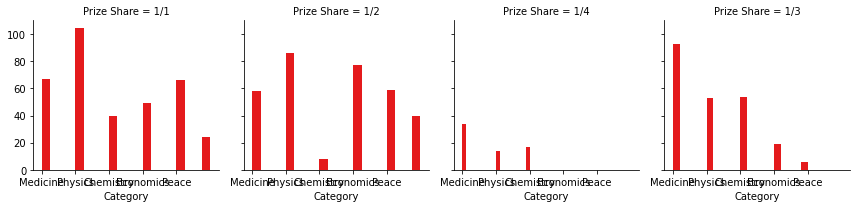

In [255]:
c = sns.FacetGrid(df, col='Prize Share')
c.map(plt.hist, 'Category', bins=20)

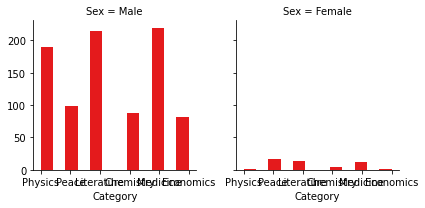

In [256]:
g = sns.FacetGrid(df_cat, col='Sex')
g.map(plt.hist, 'Category', bins=12)

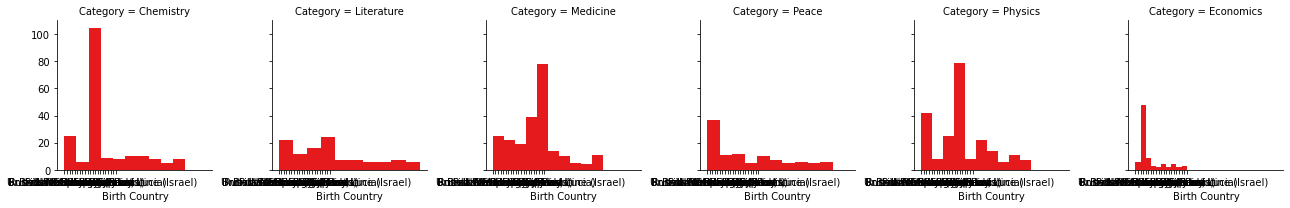

In [257]:
l = sns.FacetGrid(df_cat, col='Category')
l.map(plt.hist, 'Birth Country', bins=10)

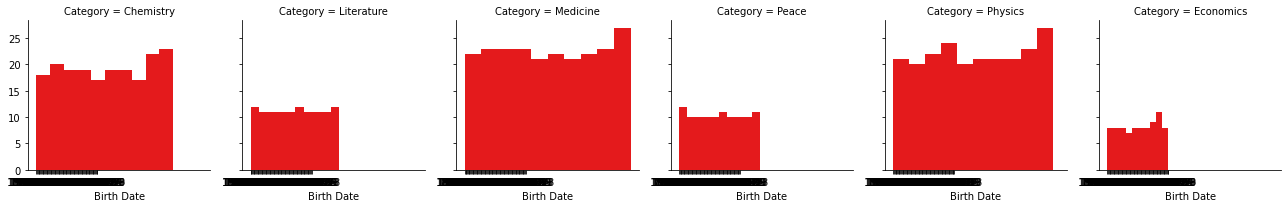

In [258]:
m = sns.FacetGrid(df, col='Category')
m.map(plt.hist, 'Birth Date', bins=10)

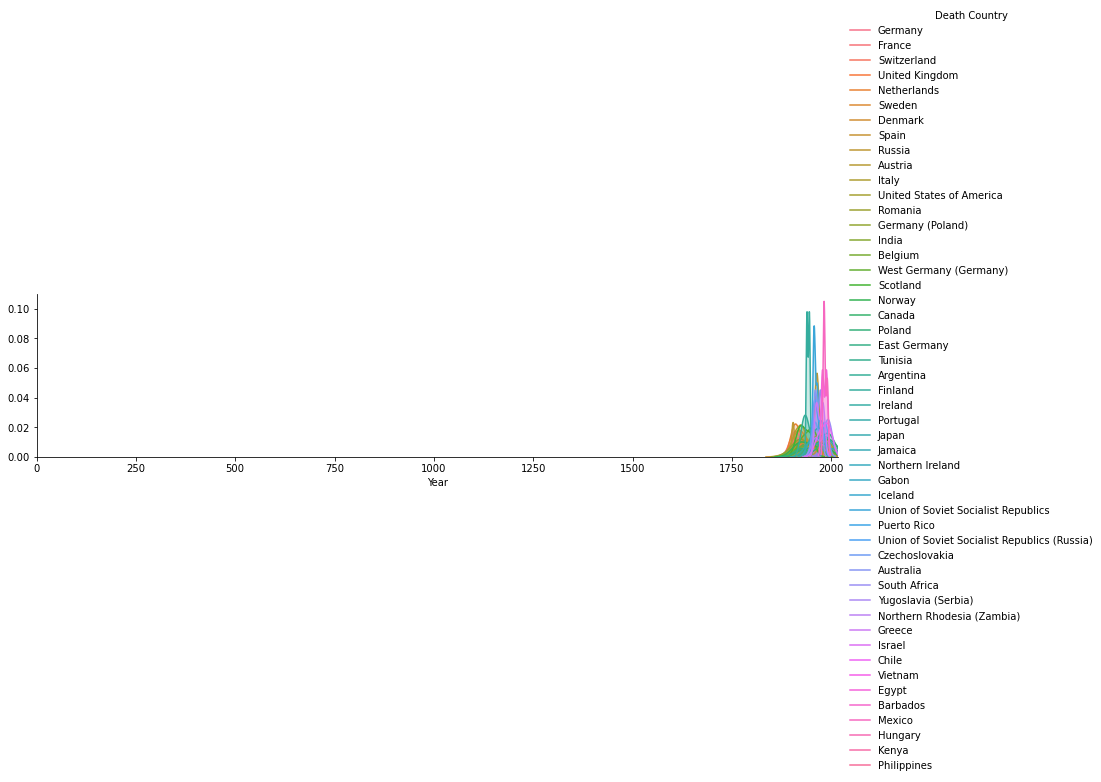

In [262]:
#plot distributions of winners Death Country
a = sns.FacetGrid( df, hue = 'Death Country', aspect=4 )
a.map(sns.kdeplot, 'Year', shade= True )
a.set(xlim=(0 , df['Year'].max()))
a.add_legend()

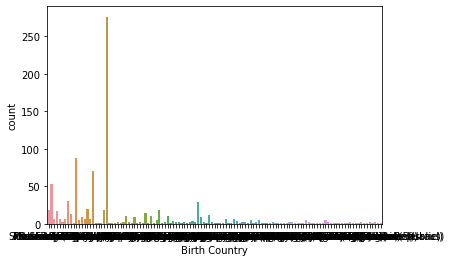

In [23]:
sns.countplot(df['Birth Country'])

#df.plot(figsize=(15,5))

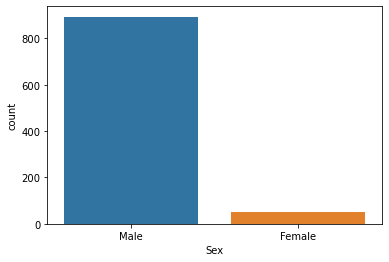

In [18]:
sns.countplot(df['Sex'])

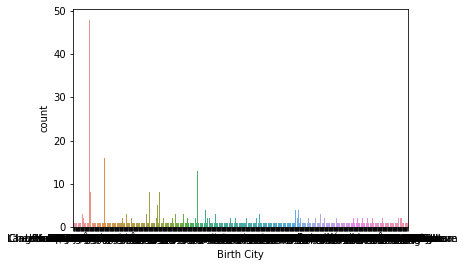

In [16]:
sns.countplot(df['Birth City'])

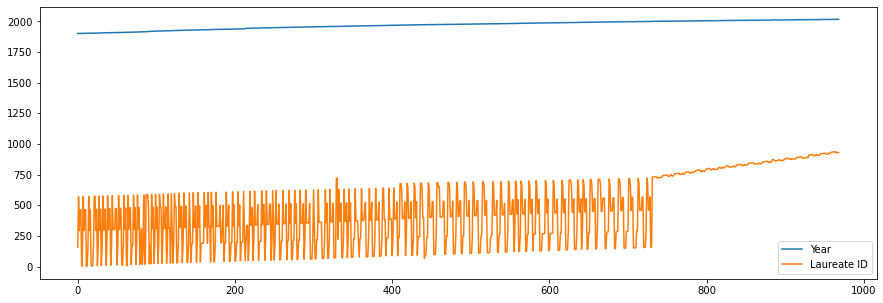

In [15]:
df['Motivation'].astype(str)
#sns.factorplot('Category',df,hue='Prize')

df.plot(figsize=(15,5))

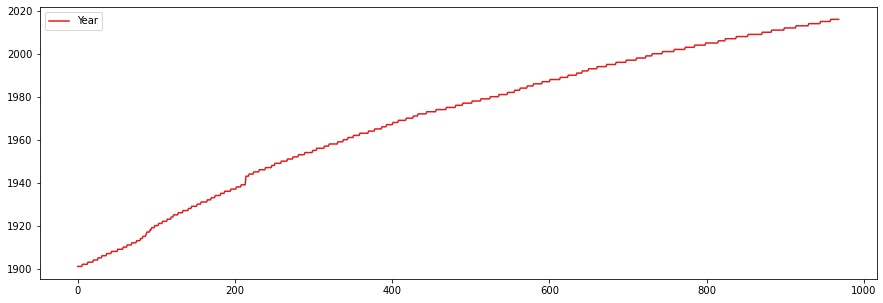

In [127]:
df['Year'].plot(legend=True,figsize=(15,5))

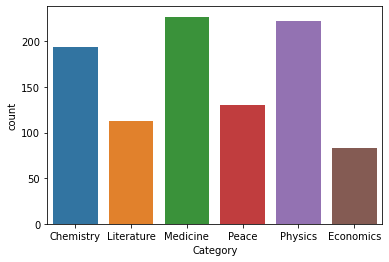

In [5]:
sns.countplot(df['Category'])

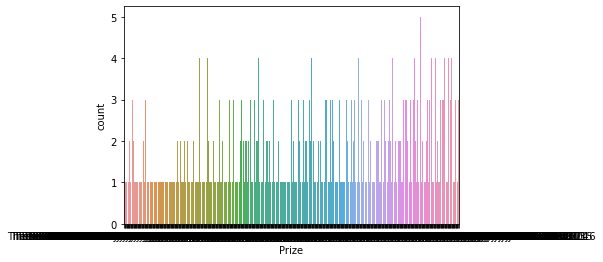

In [6]:
sns.countplot(df['Prize'])

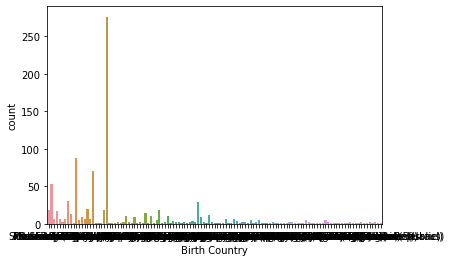

In [72]:
sns.countplot(df['Birth Country'])

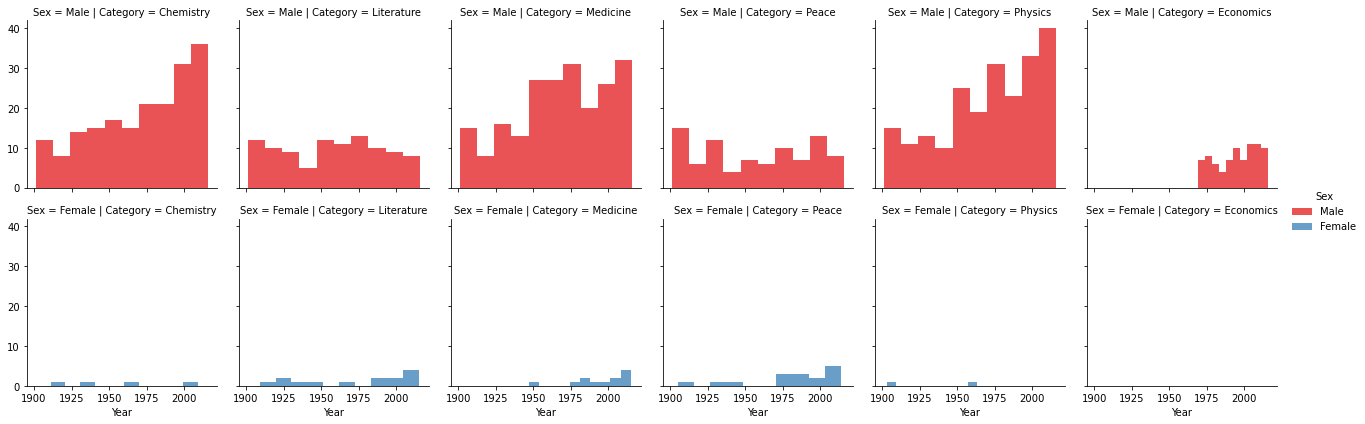

In [87]:
#histogram comparison of sex, Category, and Year 
h = sns.FacetGrid(df, row = 'Sex', col = 'Category', hue = 'Sex')
h.map(plt.hist, 'Year', alpha = .75)
h.add_legend()

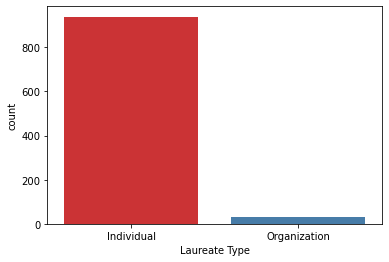

In [128]:
sns.countplot(df['Laureate Type'])

In [ ]:
on = df['Organization Name'].value_counts()

In [ ]:
o = on.head(15)

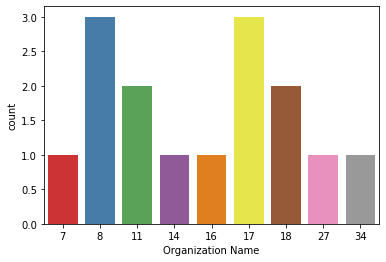

In [261]:
sns.countplot(o)

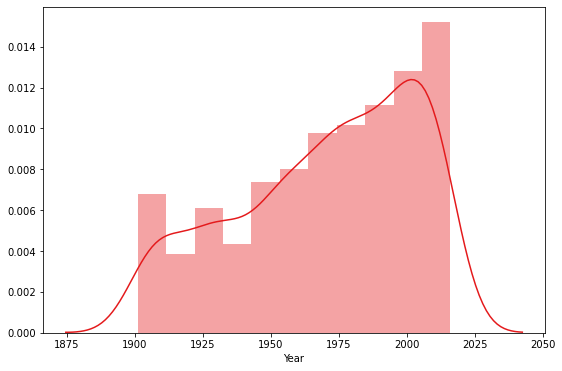

In [150]:
plt.figure(figsize=(9,6))
plt.tight_layout()
seabornInstance.distplot(df['Year'])

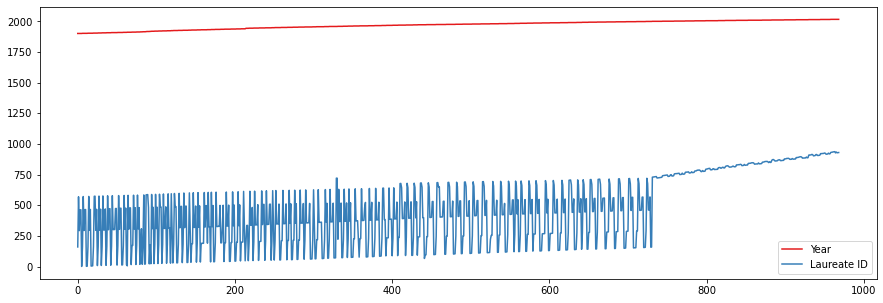

In [162]:
df['Category'].astype(str)
#sns.factorplot('Sex',df,hue='Pclass')

df.plot(figsize=(15,5))

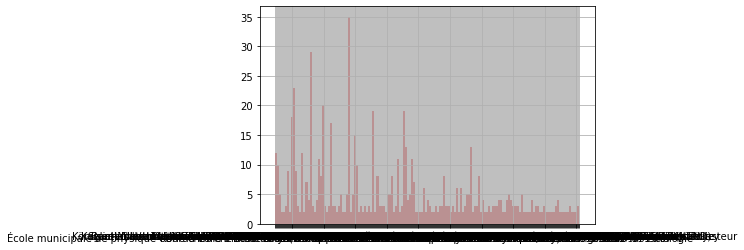

In [170]:
df['Organization Name'].hist(bins=150)

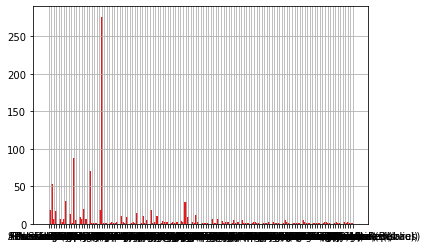

In [171]:
df['Birth Country'].hist(bins=150)

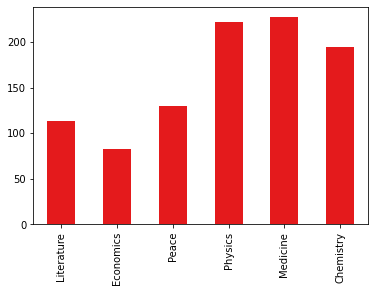

In [189]:
df["Category"].value_counts(sort = False).plot.bar()

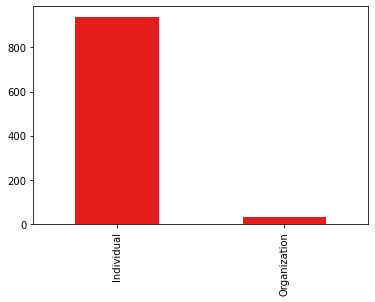

In [192]:
df["Laureate Type"].value_counts(sort = False).plot.bar()

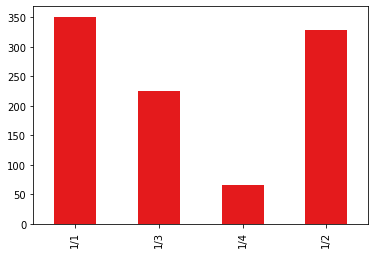

In [193]:
df["Prize Share"].value_counts(sort = False).plot.bar()

In [ ]:
df["Prize Share"].value_counts(sort = False).plot.bar()

904


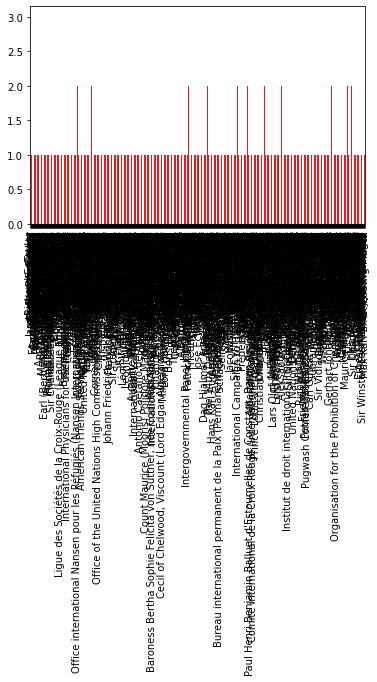

In [199]:
print(df["Full Name"].unique().shape[0])
df["Full Name"].value_counts(sort = False).plot.bar()

292


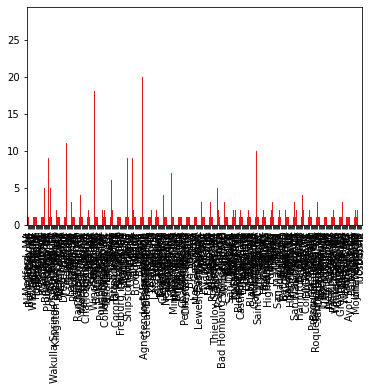

In [200]:
print(df["Death City"].unique().shape[0])
df["Death City"].value_counts(sort = False).plot.bar()

In [202]:
df.groupby(["Birth City", "Category"]).size()

Birth City     Category  
&#346;eteniai  Literature    1
's Graveland   Economics     1
Aarberg        Chemistry     2
Abeokuta       Literature    1
Aberdeen       Physics       1
                            ..
Zusamaltheim   Chemistry     2
the Hague      Economics     1
               Medicine      1
               Physics       1
Ålesund        Medicine      1
Length: 728, dtype: int64

316


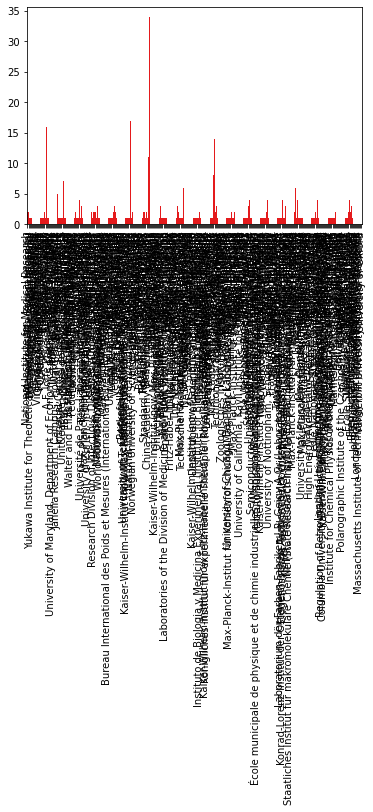

In [203]:
print(df["Organization Name"].unique().shape[0])
df["Organization Name"].value_counts(sort = False).plot.bar()

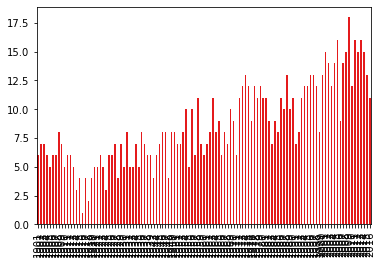

In [215]:
df["Year"].value_counts(sort = False).plot.bar()

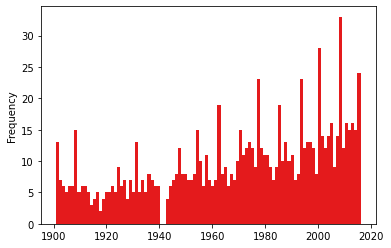

In [219]:
df["Year"].plot.hist(bins = 100)

In [84]:
df.columns

Index(['Year', 'Category', 'Prize', 'Motivation', 'Prize Share', 'Laureate ID',
       'Laureate Type', 'Full Name', 'Birth Date', 'Birth City',
       'Birth Country', 'Sex', 'Organization Name', 'Organization City',
       'Organization Country', 'Death Date', 'Death City', 'Death Country'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob